In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rc_context
sc.settings.verbosity = 1

#sc.logging.print_versions()

import os 
import sys
import gc
import importlib

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'
sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
sns.set_style('white', {'axes.grid' : False})

sys.path.append('/home/lee/project/scanpy_func/')

import scanpy_func as sf

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

In [2]:
adata = sc.read_h5ad('/storage/zhufan/01.herv/figure/gse_bulk_celltype_herv.h5ad')
adata

AnnData object with n_obs × n_vars = 4901 × 56668
    obs: 'age', 'sex', 'indiv_ID_celltype', 'celltype', 'gene_counts'
    var: 'n_cells', 'herv'
    uns: 'log1p', 'rank_genes_groups'
    layers: 'counts'

In [3]:
# adata = sc.read_h5ad('herv_indiv_celltyp.h5ad')
adata

AnnData object with n_obs × n_vars = 4901 × 56668
    obs: 'age', 'sex', 'indiv_ID_celltype', 'celltype', 'gene_counts'
    var: 'n_cells', 'herv'
    uns: 'log1p', 'rank_genes_groups'
    layers: 'counts'

In [4]:
import scipy.sparse as sps
tmp = sps.csr_matrix(adata.X)
tmp

<4901x56668 sparse matrix of type '<class 'numpy.float32'>'
	with 13379027 stored elements in Compressed Sparse Row format>

In [5]:
adata.X = tmp

In [7]:
hdeg = sf.deg(adata, groupby='celltype', use_raw=False)
hdeg

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:22)


,CD4-T_names,CD4-T_logfoldchanges,CD4-T_pvals_adj,CD8-T_names,CD8-T_logfoldchanges,CD8-T_pvals_adj,NK_names,NK_logfoldchanges,NK_pvals_adj,Bcells_names,Bcells_logfoldchanges,Bcells_pvals_adj,Myeloid_names,Myeloid_logfoldchanges,Myeloid_pvals_adj
0,LTR33_dup233-chr20,5.648187,0.000000e+00,MLT1G3-chr12,3.089540,0.000000e+00,LTR7_dup7-chr12,5.470535,0.000000e+00,MLT1N2_dup9-chr11,5.445128,0.000000e+00,MER57F_dup17-chr1,4.616933,0.000000e+00
1,MLT1D_dup364-chr10,3.542409,0.000000e+00,MSTC_dup6-chr12,2.944267,2.531206e-271,LTR37B_dup34-chr18,6.445863,0.000000e+00,MLT1D_dup485-chr6,4.333003,0.000000e+00,LTR45B_dup4-chr11,6.310612,0.000000e+00
2,MER61A_dup46-chr4,4.801365,0.000000e+00,HERVIP10FH-int_dup1-chr12,3.200876,1.501388e-268,PRIMA4-int_dup6-chr14,4.196371,0.000000e+00,MLT1H2_dup140-chr2,5.862355,0.000000e+00,MLT1B_dup104-chr22,7.625187,0.000000e+00
3,MER74A_dup13-chr21,3.346395,0.000000e+00,LTR37-int_dup6-chr12,2.754664,1.756767e-268,ERV3-16A3_LTR_dup3-chr2,5.657044,0.000000e+00,LTR22A_dup2-chr8,6.801529,0.000000e+00,MLT1G1_dup122-chr12,3.352938,1.727549e-262
4,LTR16C_dup325-chr3,4.928322,0.000000e+00,MLT1D_dup92-chr1,5.001920,1.325191e-232,MER4E1_dup18-chr15,3.131769,0.000000e+00,MLT1C_dup546-chr16,3.476097,0.000000e+00,LTR40c_dup23-chr8,3.600433,1.959716e-215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56663,MER57F_dup17-chr1,-4.302312,7.987348e-114,MLT1N2_dup9-chr11,-2.644335,2.183143e-64,Harlequin-int_dup62-chr1,-5.144259,8.566696e-149,MLT1H1_dup60-chr6,-3.382022,1.583483e-255,ERV3-16A3_I-int_dup243-chr2,-2.160564,0.000000e+00
56664,MER4B-int_dup13-chr19,-3.646656,1.426893e-127,MER57F_dup17-chr1,-2.762393,2.524619e-70,MLT1B_dup976-chr6,-4.467678,7.371962e-152,MLT1C_dup335-chr17,-3.300585,7.290928e-271,MER21B_dup70-chr10,-2.674735,0.000000e+00
56665,MSTC_dup122-chr8,-0.938325,1.979803e-248,MLT1H2_dup140-chr2,-3.913931,1.607860e-70,MLT1G1_dup122-chr12,-3.408360,2.397803e-164,MLT1A0_dup280-chr14,-5.423370,0.000000e+00,ERV3-16A3_I-int_dup246-chr2,-2.644536,0.000000e+00
56666,MLT1A0_dup524-chr14,-2.709196,0.000000e+00,Harlequin-int_dup62-chr1,-4.638107,4.983010e-125,MLT1D_dup485-chr6,-3.453020,9.330720e-175,Harlequin-int-chr17,-3.875858,0.000000e+00,MLT1A1_dup514-chr2,-2.571218,0.000000e+00


In [7]:
adata.obs['celltype'].unique()

['Bcells', 'CD4-T', 'CD8-T', 'Myeloid', 'NK']
Categories (5, object): ['CD4-T' < 'CD8-T' < 'NK' < 'Bcells' < 'Myeloid']

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


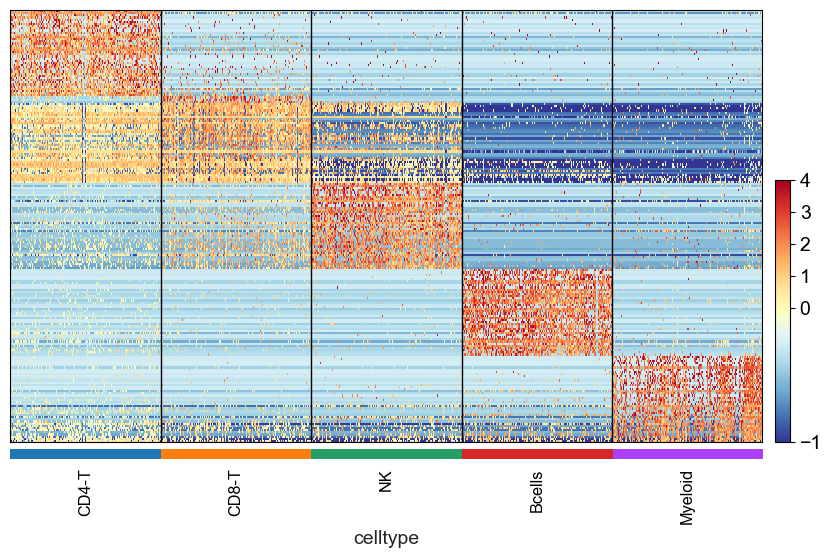

In [54]:
sf.marker_heatmap(adata, hdeg, groupby='celltype', n=40, use_raw=False, vmin=-1, vmax=4,  vcenter=-0.1, swap_axes=True, figsize=(10, 6),
                  cmap='RdYlBu_r', order=[ 'CD4-T', 'CD8-T', 'NK', 'Bcells','Myeloid'], save='herv_celltype_markers.pdf')

In [8]:
tmp = sc.read_h5ad('herv_indiv.h5ad')
tmp

AnnData object with n_obs × n_vars = 981 × 56667
    obs: 'batch', 'pool', 'indiv_ID', 'disease', 'genetic_ancestry', 'sex', 'age', 'age_stage', 'age_phase'
    var: 'chrom', 'start', 'end', 'width', 'annotation', 'distanceToTSS', 'gene_name', 'site_name', 'name', 'rep_name', 'anno'
    layers: 'counts'

In [9]:
adata = adata[:, tmp.var_names]
adata.var = tmp.var.copy()

extracting highly variable genes


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
3197


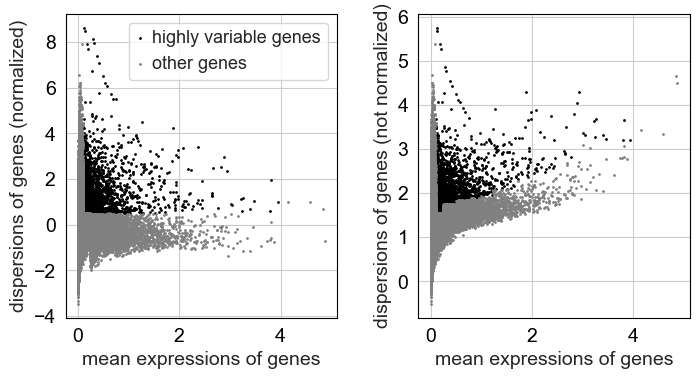

In [10]:
min_disp=0.5
min_mean=0.1
max_mean=4

sc.pp.highly_variable_genes(adata, flavor="seurat", min_disp=min_disp, min_mean=min_mean, max_mean=max_mean)
print(adata.var['highly_variable'].sum())
sc.pl.highly_variable_genes(adata)


In [24]:
adata.var['anno'].value_counts()

anno
Distal Intergenic         1264
intron_sample_strand       956
intron_opposite_strand     804
Promoter                   167
Downstream (<=300bp)         4
3' UTR                       2
Name: count, dtype: int64

In [20]:
adata.var.to_csv("highly_variable_HERV.tsv",sep = "\t")

In [11]:
adata.raw = adata

/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


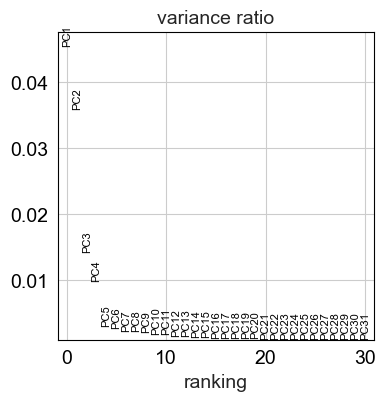

In [12]:
adata = adata[:, adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)

sc.pp.pca(adata)
sc.pl.pca_variance_ratio(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Cat

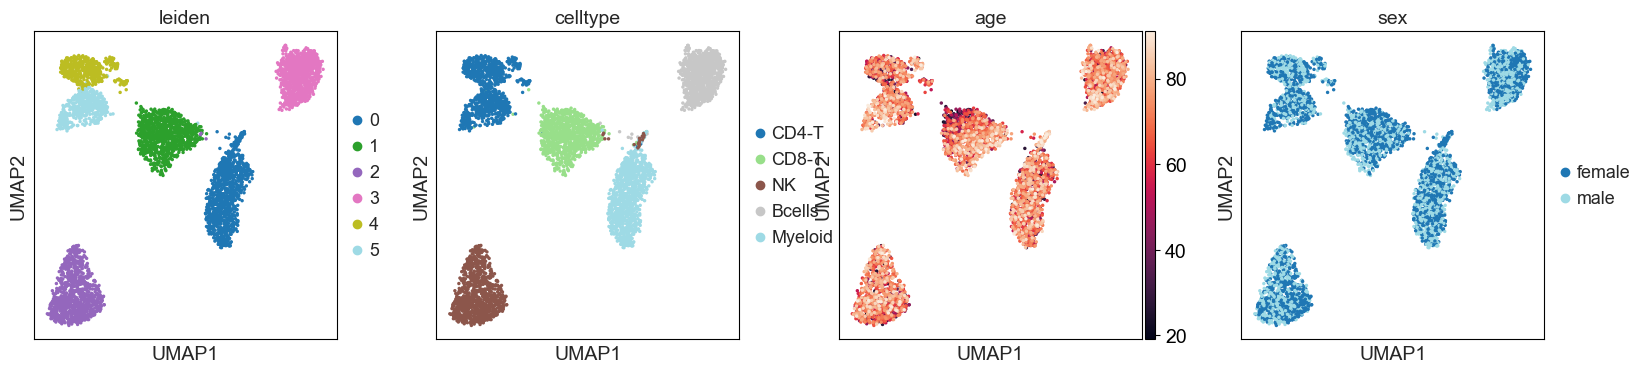

In [16]:
n_neighbors=30
n_pcs=10
res=0.5

#sc.pp.neighbors(adata, n_neighbors=n_neighbors)
sc.tl.umap(adata)

#sc.tl.leiden(adata, resolution=res)
sc.pl.umap(adata, color=['leiden', 'celltype', 'age', 'sex'], vmax='p99', palette='tab20', )

/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Cat

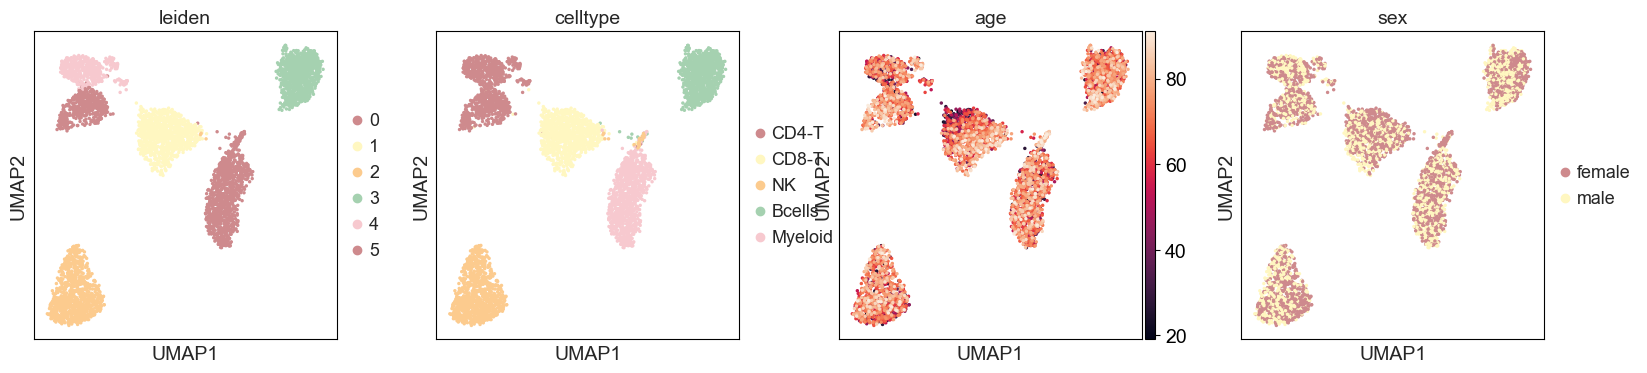

In [17]:

colors = ["#CE8A8D", "#FFF7C1", "#FCCB8E", "#A5D1B0", "#F7C9CF", ]
sc.pl.umap(adata, color=['leiden', 'celltype', 'age', 'sex'], vmax='p99', palette=colors,)

/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


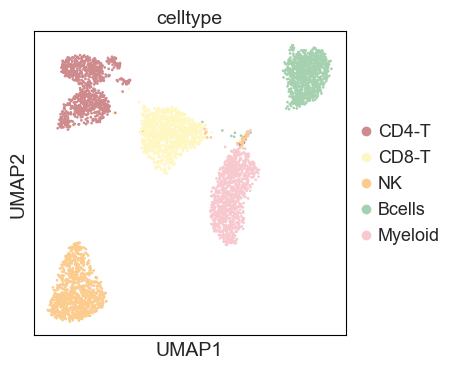

In [25]:
sc.pl.umap(adata, color=['celltype'], vmax='p99', palette=colors, save='new_herv_cluster.pdf', size=15)

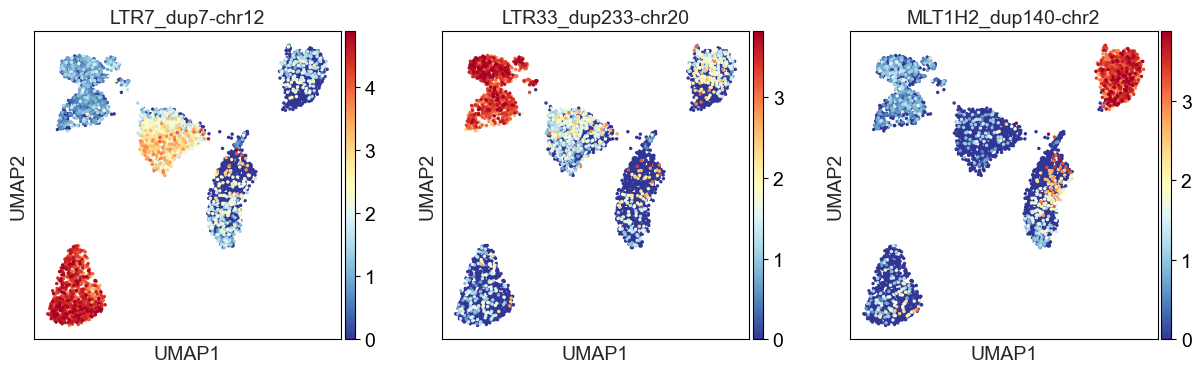

In [27]:
genes = ['LTR7_dup7-chr12', 'LTR33_dup233-chr20', 'MLT1H2_dup140-chr2']
sc.pl.umap(adata, color=genes, vmax='p99', cmap='RdYlBu_r',  save='new_herv_markers.pdf')

<Axes: xlabel='r2', ylabel='Count'>

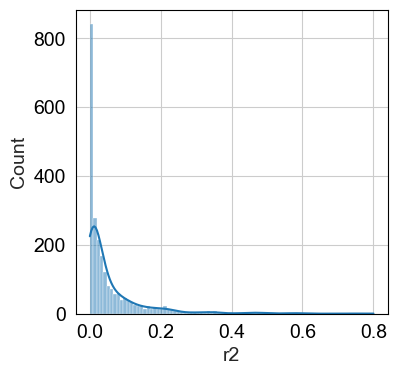

In [113]:
corr = pd.read_csv('herv_rna_corr.csv', index_col=0)
hvg_corr = corr.loc[corr.index.isin(adata.var_names), :]
sns.histplot(hvg_corr['r2'], kde=True)

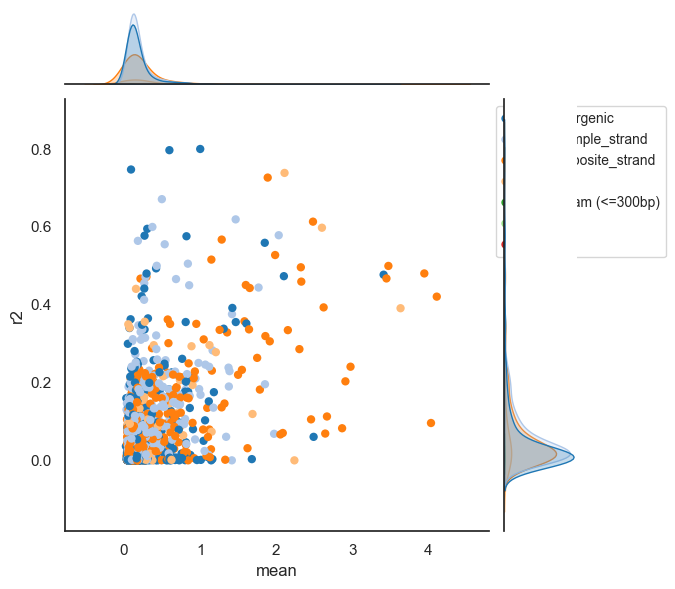

In [139]:
sns.set_theme(style="white", )
sns.jointplot(data=hvg_corr, x='mean', y='r2', hue='anno', linewidth=0, palette='tab20',
               hue_order = ['Distal Intergenic', 'intron_sample_strand', 'intron_opposite_strand', 'Promoter', 'Downstream (<=300bp)', '3\' UTR', '5\' UTR'],)

# sns.scatterplot(data=df.loc[df['anno']=='intron_opposite_strand'], x='mean', y='r')

# sns.scatterplot(data=df.loc[df['anno']=='intron_sample_strand'], x='mean', y='r')
plt.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
plt.savefig('hvg_corr.pdf')

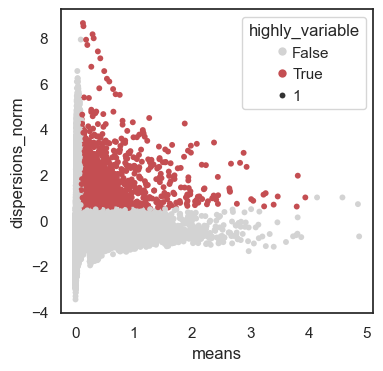

In [161]:
# tmp = adata.raw.to_adata()
sns.scatterplot(data=tmp.var, x='means', y='dispersions_norm', hue='highly_variable', size=1, linewidth=0, palette=['lightgrey', "r"], rasterized=True, )
plt.savefig('hvg_dispersion.pdf')

# correlation

In [174]:
# rna = sc.read_h5ad('rna_indiv_celltype.h5ad')
rna = rna[rna.obs['celltype'].isin([ 'CD4-T', 'CD8-T', 'NK', 'Bcells','Myeloid']),:]

In [176]:
rna.raw = rna
# rna = rna.raw.to_adata()

In [180]:
rna.obs_names = [x.replace('@', '_') for x in rna.obs_names]
rna.obs = adata.obs

In [187]:
rna = rna.raw.to_adata()
rna.X = sps.csr_matrix(rna.X)

In [189]:
rna_mean = sf.adata_group(rna, groupby='celltype', method='mean')
rna_mean

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 5 × 23050
    obs: 'celltype'

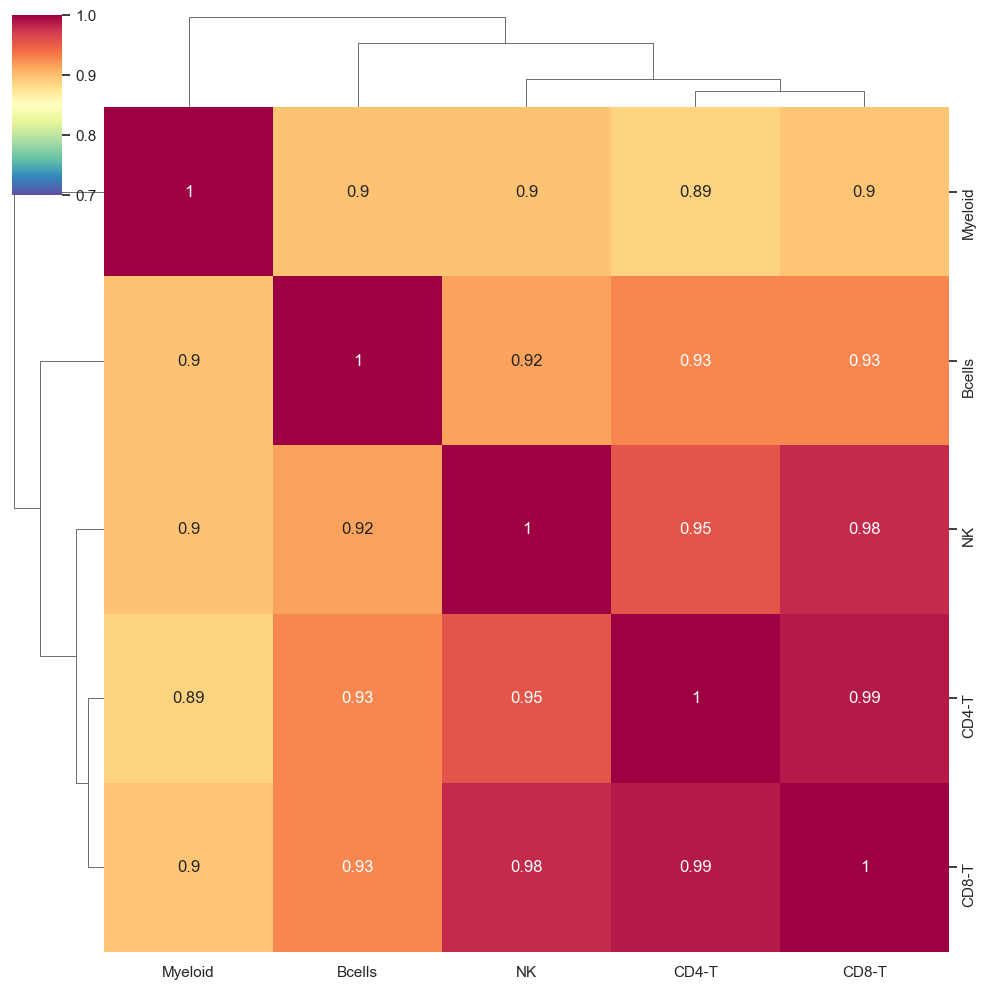

In [220]:
rna_corr = pd.DataFrame(np.corrcoef(rna_mean.X, rowvar=True), columns=rna_mean.obs_names, index=rna_mean.obs_names)
sns.clustermap(rna_corr, cmap='Spectral_r', vmin=0.7, annot=True, dendrogram_ratio=0.1)
plt.savefig('rna_bulk_corr.pdf')

In [191]:
adata = adata.raw.to_adata()
adata.X = sps.csr_matrix(adata.X)

In [192]:
adata_mean = sf.adata_group(adata, groupby='celltype', method='mean')
adata_mean

/home/lee/miniconda3/envs/rapids/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 5 × 56667
    obs: 'celltype'

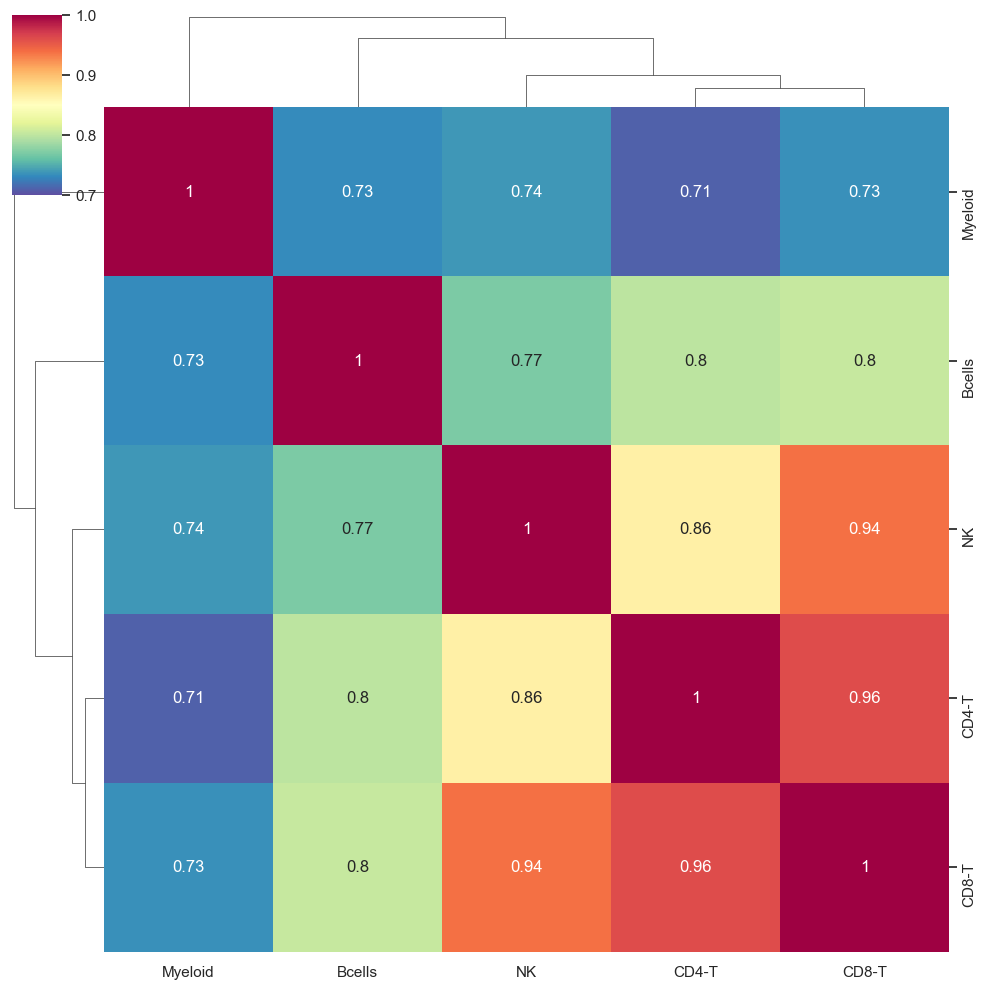

In [221]:
adata_corr = pd.DataFrame(np.corrcoef(adata_mean.X, rowvar=True), columns=adata_mean.obs_names, index=adata_mean.obs_names)
sns.clustermap(adata_corr, cmap='Spectral_r', vmin=0.7, annot=True, dendrogram_ratio=0.1)
plt.savefig('herv_bulk_corr.pdf')